# Complex Network Analysis on The Bible Names

http://konect.uni-koblenz.de/networks/moreno_names

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy.linalg
import numpy as np

## 1. Read Data (the pandas way)
Here we read the .csv file and convert the readed data into a NetworkX format network.

In [2]:
edges = pd.read_csv("data/data.csv",header = None)
edges.columns = ["from", "to", "weight"]

In [3]:
#edges = edges[edges.weight > 5] #filter out weights lower than 5 (execution time is faster)
edges.head(10)

,from,to,weight
0,israel,judah,100
1,jerusalem,judah,78
2,david,israel,73
3,david,saul,67
4,israel,moses,67
5,aaron,moses,66
6,israel,jerusalem,54
7,christ,jesus,52
8,egypt,israel,40
9,abraham,isaac,34


In [4]:
G = nx.from_pandas_edgelist(edges, *edges.columns)
print(G.edges(data = True))

[('israel', 'judah', {'weight': 100}), ('israel', 'david', {'weight': 73}), ('israel', 'moses', {'weight': 67}), ('israel', 'jerusalem', {'weight': 54}), ('israel', 'egypt', {'weight': 40}), ('israel', 'jeroboam', {'weight': 33}), ('israel', 'saul', {'weight': 31}), ('israel', 'aaron', {'weight': 31}), ('israel', 'philistines', {'weight': 27}), ('israel', 'sin', {'weight': 26}), ('israel', 'joshua', {'weight': 25}), ('israel', 'solomon', {'weight': 22}), ('israel', 'samaria', {'weight': 21}), ('israel', 'jordan', {'weight': 21}), ('israel', 'benjamin', {'weight': 21}), ('israel', 'jacob', {'weight': 19}), ('israel', 'moab', {'weight': 17}), ('israel', 'ammon', {'weight': 17}), ('israel', 'ephraim', {'weight': 17}), ('israel', 'pharaoh', {'weight': 16}), ('israel', 'eleazar', {'weight': 16}), ('israel', 'ahab', {'weight': 16}), ('israel', 'assyria', {'weight': 15}), ('israel', 'samuel', {'weight': 15}), ('israel', 'jehoshaphat', {'weight': 15}), ('israel', 'reuben', {'weight': 14}), ('i

## 2. Compute Adjacency Matrix
An adjacency matrix $A$ is a square $N\times N$ matrix, where $N$ is the size of grah to be definied. The row and colun indexes indicate the source and tharget nodes, respectively.

In our case it is undirected and weighted, numbers are edge weights (positive).

In [5]:
A = nx.to_pandas_adjacency(G); A

,israel,judah,jerusalem,david,saul,moses,aaron,christ,jesus,egypt,...,betah,assur,shamir,hachmoni,zephath,cabul,berothai,nephish,philippi,hashupha
israel,0.0,100.0,54.0,73.0,31.0,67.0,31.0,3.0,5.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
judah,100.0,0.0,78.0,27.0,4.0,4.0,3.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
jerusalem,54.0,78.0,0.0,30.0,1.0,2.0,0.0,0.0,2.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
david,73.0,27.0,30.0,0.0,67.0,1.0,1.0,5.0,5.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
saul,31.0,4.0,1.0,67.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cabul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
berothai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nephish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
philippi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
A.shape

(1773, 1773)

## 3. Compute Incidence Matrix

An incidence matrix $J$ is a rectangular matrix $N \times M$ matrix, where $N$ is the number of nodes and $M$ is the number of edges.

A  $1$ at $J[i,j]$  (or a positive weight nonzero) means that the node $i$ is incident to the edge $J$. All other elements of $J$ are $0$s

In [7]:
J = nx.incidence_matrix(G, oriented = False, weight='weight').todense(); J

matrix([[100.,  73.,  67., ...,   0.,   0.,   0.],
        [100.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [8]:
J.shape

(1773, 9131)

## 4 Ablation study (Visualization)

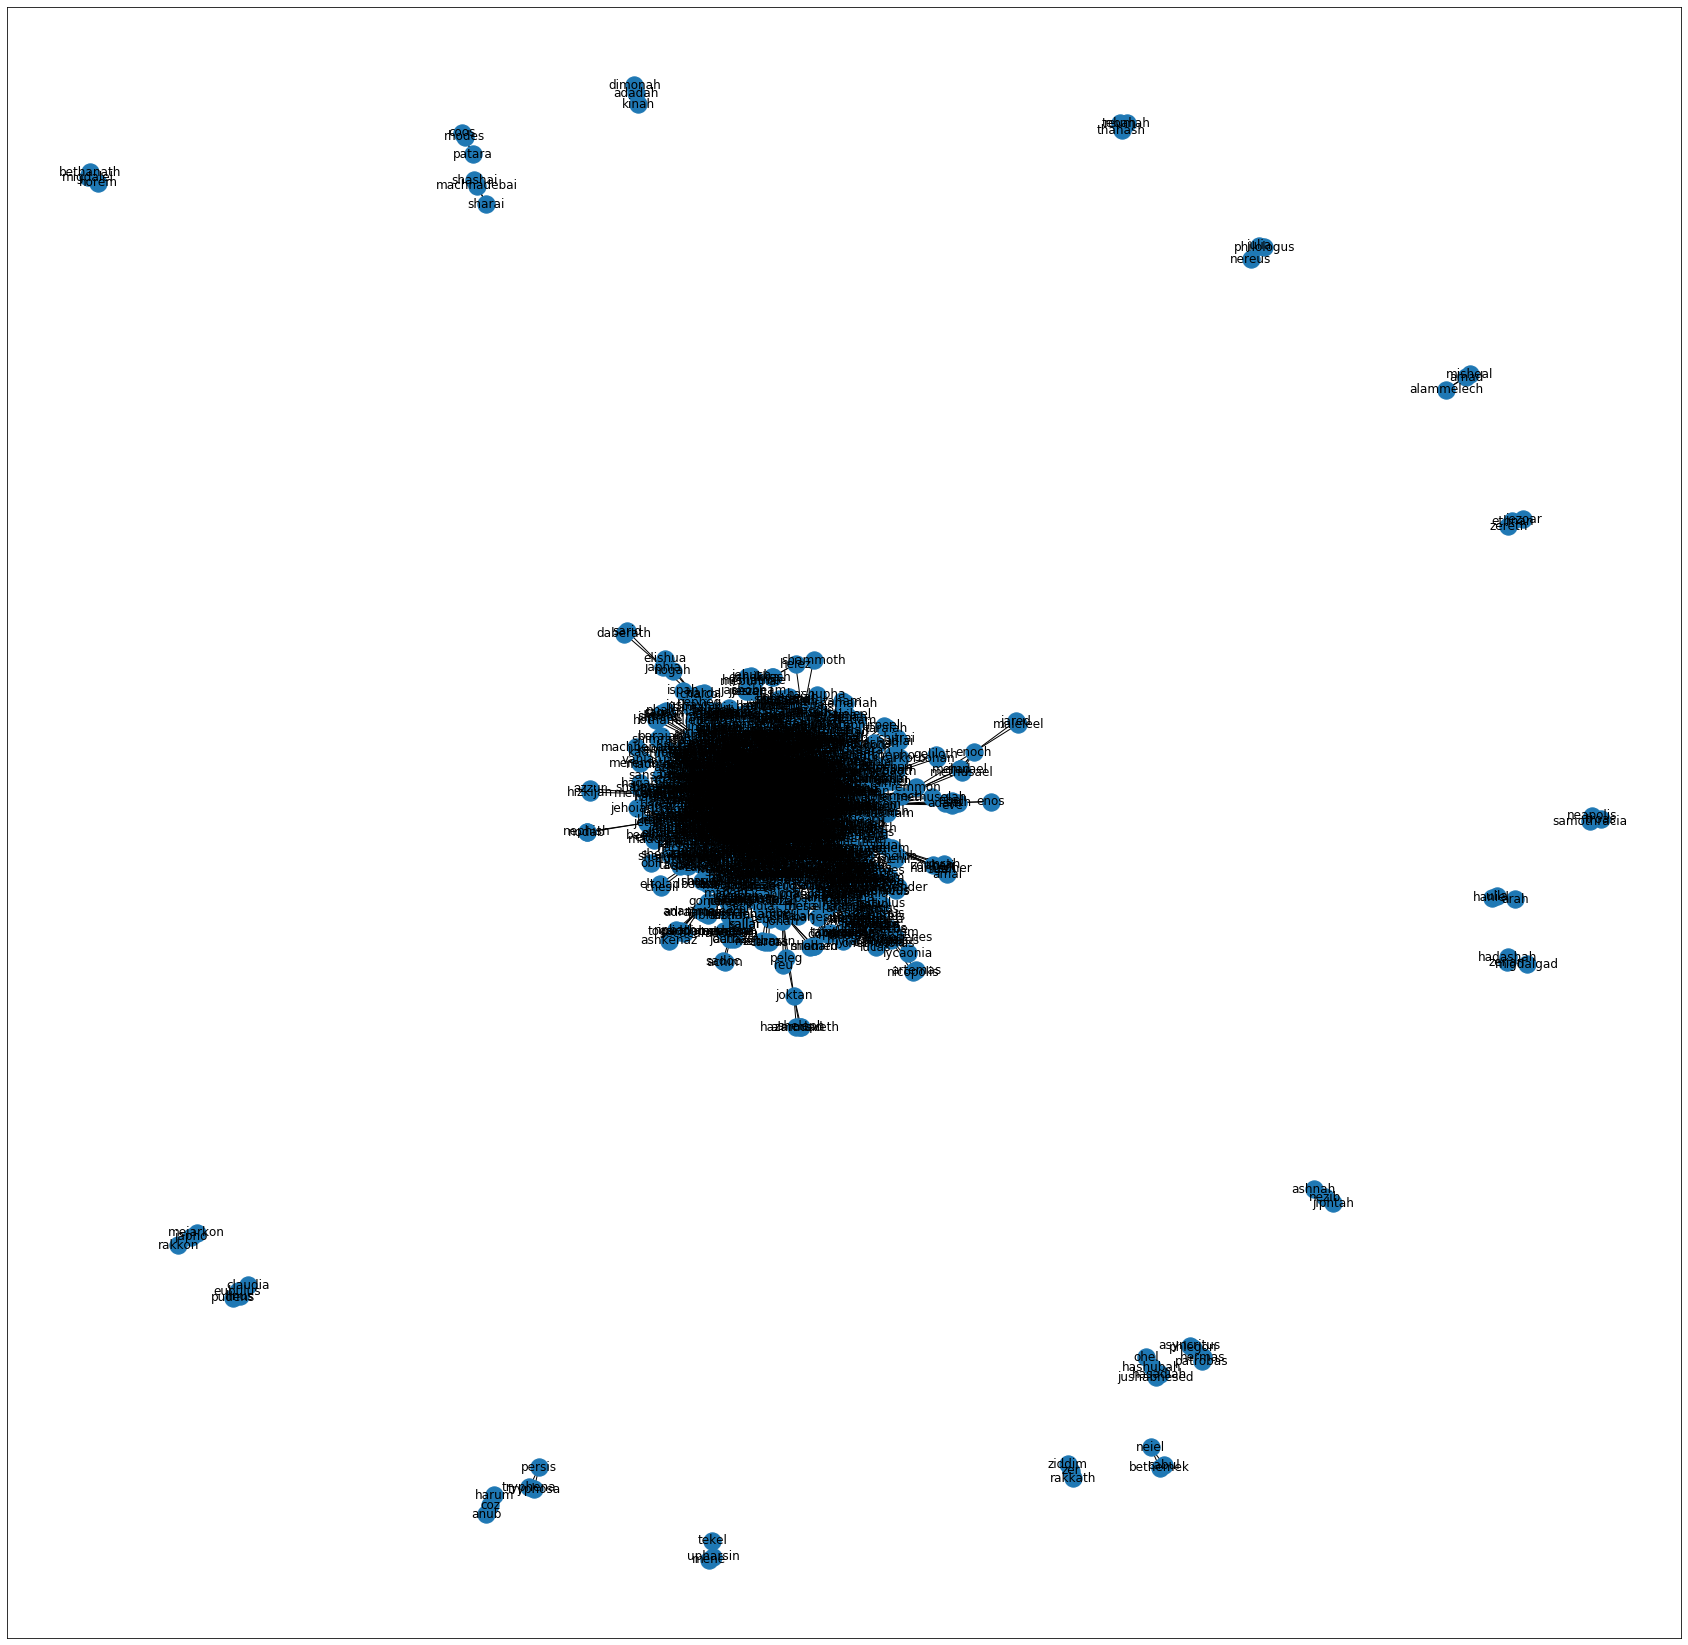

In [9]:
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos = pos)
plt.draw()

Following we create an atribute *location* and hardcode some vlaues to ture (by default it is considered not a location)

In [10]:
df_labs =  pd.read_excel("data/labels.xlsx", sheet_name="Sheet2")
locations = df_labs[df_labs["Location"] == 0]["Node"]



In [11]:
node_dict = dict(G.nodes(data = "location", default = False))
# locations = ['israel',
#              'judah',
#              'jerusalem',
#              'egypt',
#              'babylon',
#              'samaria',
#              'jordan',
#              'gilead',
#              'moab',
             
#             ]
for l in locations:
    node_dict[l] = True
node_dict

{'israel': False,
 'judah': False,
 'jerusalem': False,
 'david': False,
 'saul': False,
 'moses': False,
 'aaron': False,
 'christ': False,
 'jesus': False,
 'egypt': False,
 'abraham': False,
 'isaac': False,
 'jacob': False,
 'jeroboam': False,
 'babylon': False,
 'pharaoh': False,
 'philistines': False,
 'sin': False,
 'benjamin': False,
 'jonathan': False,
 'joshua': False,
 'solomon': False,
 'samaria': False,
 'jordan': False,
 'joab': False,
 'peter': False,
 'ephraim': False,
 'abner': False,
 'manasseh': False,
 'nebat': False,
 'eleazar': False,
 'jehoshaphat': False,
 'simon': False,
 'joseph': False,
 'gilead': False,
 'zedekiah': False,
 'moab': False,
 'ammon': False,
 'gad': False,
 'reuben': False,
 'asa': False,
 'hebron': False,
 'amaziah': False,
 'james': False,
 'john': False,
 'hezekiah': False,
 'paul': False,
 'ahab': False,
 'heshbon': False,
 'sihon': False,
 'zeruiah': False,
 'bashan': False,
 'og': False,
 'assyria': False,
 'samuel': False,
 'nun': False,

In [12]:
node_dict.keys()

dict_keys(['israel', 'judah', 'jerusalem', 'david', 'saul', 'moses', 'aaron', 'christ', 'jesus', 'egypt', 'abraham', 'isaac', 'jacob', 'jeroboam', 'babylon', 'pharaoh', 'philistines', 'sin', 'benjamin', 'jonathan', 'joshua', 'solomon', 'samaria', 'jordan', 'joab', 'peter', 'ephraim', 'abner', 'manasseh', 'nebat', 'eleazar', 'jehoshaphat', 'simon', 'joseph', 'gilead', 'zedekiah', 'moab', 'ammon', 'gad', 'reuben', 'asa', 'hebron', 'amaziah', 'james', 'john', 'hezekiah', 'paul', 'ahab', 'heshbon', 'sihon', 'zeruiah', 'bashan', 'og', 'assyria', 'samuel', 'nun', 'esau', 'jesse', 'joash', 'galilee', 'jehoiakim', 'ithamar', 'benaiah', 'jehoiada', 'ahaziah', 'abishai', 'jericho', 'jeremiah', 'abednego', 'meshach', 'ahikam', 'gedaliah', 'phinehas', 'gibeah', 'dan', 'leah', 'ishmael', 'machir', 'abihu', 'nadab', 'josiah', 'absalom', 'nethaniah', 'rehoboam', 'rachel', 'nebuchadnezzar', 'ner', 'sarah', 'shadrach', 'zion', 'baasha', 'amoz', 'isaiah', 'balaam', 'balak', 'asahel', 'sennacherib', 'jor

In [13]:
nx.set_node_attributes(G, node_dict, "location")

In [14]:
G.nodes

NodeView(('israel', 'judah', 'jerusalem', 'david', 'saul', 'moses', 'aaron', 'christ', 'jesus', 'egypt', 'abraham', 'isaac', 'jacob', 'jeroboam', 'babylon', 'pharaoh', 'philistines', 'sin', 'benjamin', 'jonathan', 'joshua', 'solomon', 'samaria', 'jordan', 'joab', 'peter', 'ephraim', 'abner', 'manasseh', 'nebat', 'eleazar', 'jehoshaphat', 'simon', 'joseph', 'gilead', 'zedekiah', 'moab', 'ammon', 'gad', 'reuben', 'asa', 'hebron', 'amaziah', 'james', 'john', 'hezekiah', 'paul', 'ahab', 'heshbon', 'sihon', 'zeruiah', 'bashan', 'og', 'assyria', 'samuel', 'nun', 'esau', 'jesse', 'joash', 'galilee', 'jehoiakim', 'ithamar', 'benaiah', 'jehoiada', 'ahaziah', 'abishai', 'jericho', 'jeremiah', 'abednego', 'meshach', 'ahikam', 'gedaliah', 'phinehas', 'gibeah', 'dan', 'leah', 'ishmael', 'machir', 'abihu', 'nadab', 'josiah', 'absalom', 'nethaniah', 'rehoboam', 'rachel', 'nebuchadnezzar', 'ner', 'sarah', 'shadrach', 'zion', 'baasha', 'amoz', 'isaiah', 'balaam', 'balak', 'asahel', 'sennacherib', 'jora

In [15]:
G.nodes(data = True)

NodeDataView({'israel': {'location': False}, 'judah': {'location': False}, 'jerusalem': {'location': False}, 'david': {'location': False}, 'saul': {'location': False}, 'moses': {'location': False}, 'aaron': {'location': False}, 'christ': {'location': False}, 'jesus': {'location': False}, 'egypt': {'location': False}, 'abraham': {'location': False}, 'isaac': {'location': False}, 'jacob': {'location': False}, 'jeroboam': {'location': False}, 'babylon': {'location': False}, 'pharaoh': {'location': False}, 'philistines': {'location': False}, 'sin': {'location': False}, 'benjamin': {'location': False}, 'jonathan': {'location': False}, 'joshua': {'location': False}, 'solomon': {'location': False}, 'samaria': {'location': False}, 'jordan': {'location': False}, 'joab': {'location': False}, 'peter': {'location': False}, 'ephraim': {'location': False}, 'abner': {'location': False}, 'manasseh': {'location': False}, 'nebat': {'location': False}, 'eleazar': {'location': False}, 'jehoshaphat': {'loc

In [16]:
colors = ["blue" if n[1]["location"] else "pink" for n in G.nodes(data = True)]

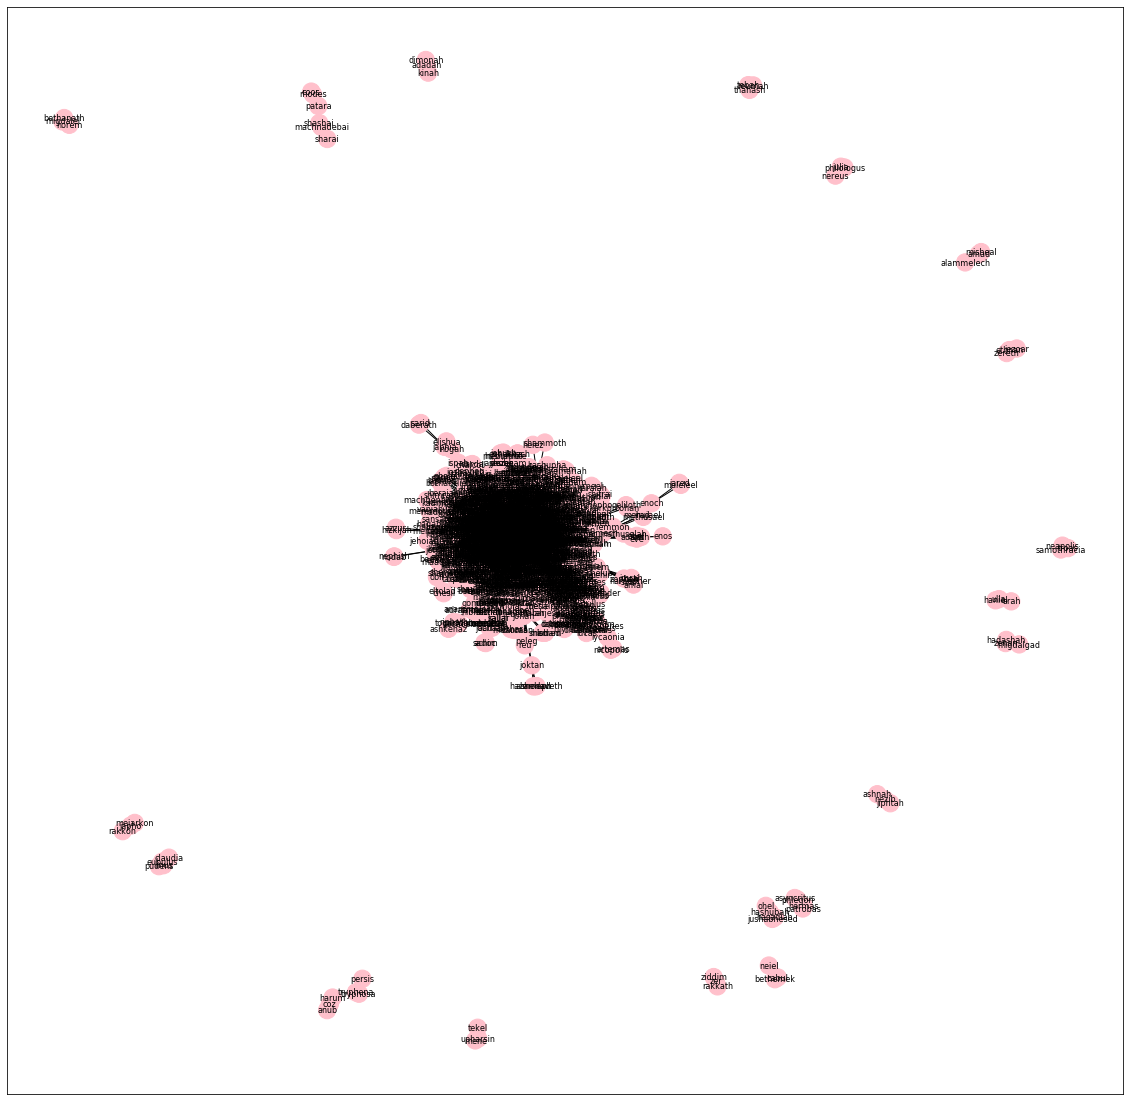

In [17]:
plt.figure(figsize=(20, 20))
nx.draw_networkx(G, pos = pos, node_color = colors,font_size = 8)
plt.draw()

In [18]:
#get the max. connected component (the component with more nodes)
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
        

In [19]:
Gc = max(connected_component_subgraphs(G), key=len)
colors = ["blue" if n[1]["location"] else "pink" for n in Gc.nodes(data = True)]

len(list(Gc.nodes))
len(colors)

1707

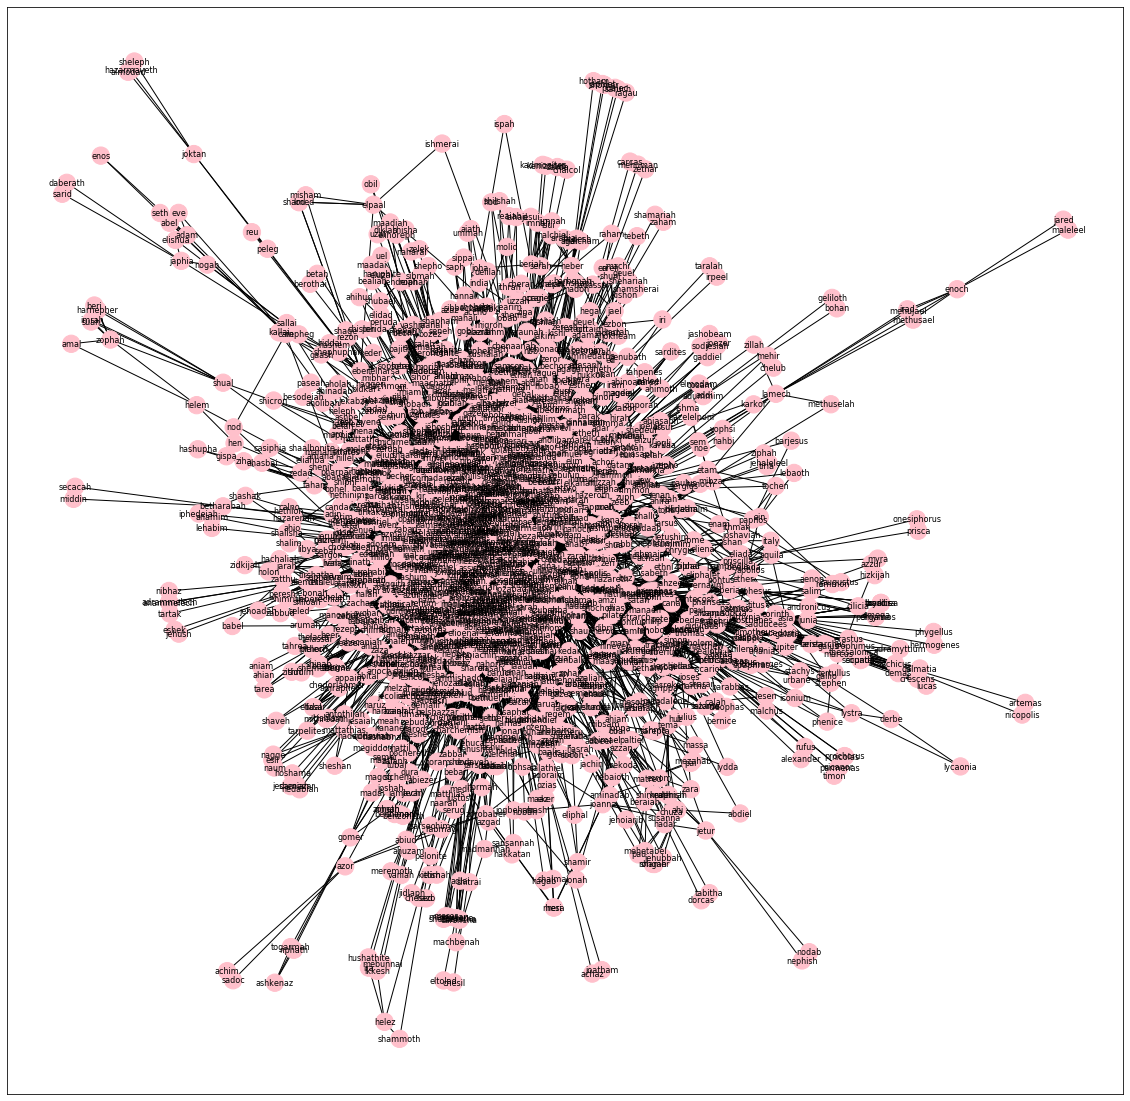

In [20]:
plt.figure(figsize=(20, 20))
nx.draw_networkx(Gc,node_color = colors,font_size = 8)
plt.draw()

## 5 Global Measures

In this section we report some global measures of the network

- Number of nodes $N$

In [21]:
len(G) #number of nodes

1773

- Number of edges $M$

In [22]:
len(G.edges) #number of edges

9131

- **Density** measures the fraction of existing edges out of all potentially possible edges.

Is a number between 0 and 1. 

A network with density 1 is a complete graph. A network with density 0 has no edges whatsoever.

For a undirected graph  $d = \frac{2m}{n(n-1)}$

In [23]:
nx.density(G)

0.005812672912855104

In [24]:
n = len(G)
m = len(G.edges)
2*m/(n*(n-1))

0.005812672912855104

- **Neibourhood** of the node *jesus*

In [25]:
jesus = G["jesus"]
print(jesus)
print(len(jesus))

{'christ': {'weight': 52}, 'peter': {'weight': 20}, 'paul': {'weight': 15}, 'galilee': {'weight': 14}, 'simon': {'weight': 11}, 'john': {'weight': 9}, 'sin': {'weight': 9}, 'nazareth': {'weight': 8}, 'philip': {'weight': 5}, 'moses': {'weight': 5}, 'israel': {'weight': 5}, 'pilate': {'weight': 5}, 'james': {'weight': 5}, 'david': {'weight': 5}, 'judaea': {'weight': 4}, 'timotheus': {'weight': 4}, 'joseph': {'weight': 4}, 'mary': {'weight': 4}, 'elias': {'weight': 3}, 'silvanus': {'weight': 3}, 'cana': {'weight': 3}, 'abraham': {'weight': 3}, 'jordan': {'weight': 3}, 'andrew': {'weight': 2}, 'martha': {'weight': 2}, 'bethany': {'weight': 2}, 'pontius': {'weight': 2}, 'jerusalem': {'weight': 2}, 'herod': {'weight': 2}, 'antichrist': {'weight': 2}, 'achaia': {'weight': 1}, 'asia': {'weight': 1}, 'ephesus': {'weight': 1}, 'philemon': {'weight': 1}, 'judas': {'weight': 1}, 'tiberias': {'weight': 1}, 'titus': {'weight': 1}, 'sosthenes': {'weight': 1}, 'pontus': {'weight': 1}, 'zebedee': {'we

It has 68 neighbours

Another way to compute the same thing (in undirected nodes, on directed nodes the metric would be different)

In [26]:
jesus_neigh = list(nx.all_neighbors(G,"jesus"))
print(jesus_neigh)
print(len(jesus_neigh))

['christ', 'peter', 'paul', 'galilee', 'simon', 'john', 'sin', 'nazareth', 'philip', 'moses', 'israel', 'pilate', 'james', 'david', 'judaea', 'timotheus', 'joseph', 'mary', 'elias', 'silvanus', 'cana', 'abraham', 'jordan', 'andrew', 'martha', 'bethany', 'pontius', 'jerusalem', 'herod', 'antichrist', 'achaia', 'asia', 'ephesus', 'philemon', 'judas', 'tiberias', 'titus', 'sosthenes', 'pontus', 'zebedee', 'magdalene', 'epaphras', 'patmos', 'bethsaida', 'cappadocia', 'tetrarch', 'iscariot', 'sadducees', 'priscilla', 'lazarus', 'thomas', 'galatia', 'cyrene', 'didymus', 'cyprus', 'isaac', 'aeneas', 'corinth', 'bithynia', 'jacob', 'pharisees', 'cleophas', 'aquila', 'satan', 'philippi', 'nathanael', 'antioch', 'capernaum']
68


In [27]:
egonet = nx.ego_graph(G,"jesus")

- **Eccentricity**:

The eccentricity i sthe maximum distance from a node to all other nodes in the network.

In [36]:
ecc = nx.eccentricity(nx.Graph(G))
# print(ecc["jesus"])


NetworkXError: Found infinite path length because the graph is not connected

## Assignment 1
Actual assignment, compute number of eigenvalues equal to zero.

Largest eigenvalue: (1.5000000000000313+0j)
Smallest eigenvalue: (-3.1296954258648093e-15+0j)


C:\Users\xavie\Anaconda3\lib\site-packages\numpy\lib\histograms.py:854: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
C:\Users\xavie\Anaconda3\lib\site-packages\matplotlib\transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
C:\Users\xavie\Anaconda3\lib\site-packages\matplotlib\transforms.py:1959: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


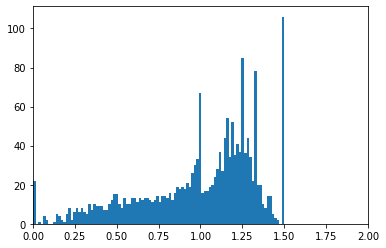

In [37]:

L = nx.normalized_laplacian_matrix(G)
e = numpy.linalg.eigvals(L.A)
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e, bins=100)  # histogram with 100 bins
plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.show()

In [38]:
e

array([0.04284032+0.j, 0.07341344+0.j, 0.06736145+0.j, ...,
       1.5       +0.j, 1.5       +0.j, 1.5       +0.j])

In [39]:
e_norm = np.array([abs(x) for x in e])
tol = 1e-6
len(e_norm[ numpy.where( e_norm < tol ) ])

22

In [40]:
## Without normalization it does not work

# LL = nx.laplacian_matrix(G, nodelist=None, weight='weight')
# e = numpy.linalg.eigvals(LL.A)
# print("Largest eigenvalue:", max(e))
# print("Smallest eigenvalue:", min(e))
# plt.hist(e, bins=100)  # histogram with 100 bins
# plt.xlim(0, 2)  # eigenvalues between 0 and 2
# plt.show()

## Assignment 2 (Macroscale)
We will base the study over the main connected component

### 2.1 Shortest paths


- Compute the **average shortest path length**. 

The average shortest path length is the sum of path lengths d(u,v) between all pairs of nodes (assuming the length is zero if v is not reachable from v) normalized by n*(n-1) where n is the number of nodes in G.


In [48]:
#We compute it on the main connected component.
#https://networkx.github.io/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html

spl = nx.average_shortest_path_length(Gc)

In [54]:
spl

3.3755393796044286

In [66]:
np.log(len(Gc.nodes))

7.442492722794441

Our shortest path length is less than half of the standard of a social network (facebook)

$$
L \sim \ln(N)
$$

In [67]:
spl/np.log(len(Gc.nodes))

0.4535495707326686

- Compute the **diameter** (larges distance between a pair of nodes in the network)

In [69]:
d = nx.diameter(Gc)
d

8

- Compute the **center** of the graph (set of all vertices of minimum eccentricity, i.e. the set of all vertices u where the greatest distance d(u,v) to other vertices is minimal.

In [71]:
c = nx.center(Gc)
c

['israel',
 'judah',
 'jerusalem',
 'david',
 'saul',
 'moses',
 'aaron',
 'egypt',
 'abraham',
 'isaac',
 'jacob',
 'babylon',
 'pharaoh',
 'philistines',
 'benjamin',
 'joshua',
 'solomon',
 'samaria',
 'jordan',
 'joab',
 'ephraim',
 'manasseh',
 'eleazar',
 'jehoshaphat',
 'joseph',
 'gilead',
 'zedekiah',
 'moab',
 'ammon',
 'gad',
 'reuben',
 'hebron',
 'sihon',
 'bashan',
 'assyria',
 'samuel',
 'nun',
 'esau',
 'joash',
 'jericho',
 'ahikam',
 'gedaliah',
 'phinehas',
 'ishmael',
 'machir',
 'balaam',
 'balak',
 'canaan',
 'edom',
 'levi',
 'jotham',
 'caleb',
 'shechem',
 'abram',
 'lot',
 'tyre',
 'ham',
 'amminadab',
 'seir',
 'pharez',
 'zebulun',
 'hamath',
 'uriah',
 'reuel',
 'shiloh',
 'elah',
 'bethel',
 'shelah',
 'bashemath',
 'zechariah',
 'aholibamah',
 'hananiah',
 'hur',
 'hittite',
 'maaseiah',
 'shemaiah',
 'hanoch',
 'er',
 'mattaniah',
 'hezron',
 'tamar',
 'elam',
 'shinar',
 'lebanon',
 'nahath',
 'shammah',
 'hamul',
 'mizzah',
 'libnah',
 'uzzi',
 'zibeon

In [73]:
print(len(c)) 

119


We have 119 elements on the center which represent 7% of the nodes from the graph (main connected component).

In [77]:
len(c)/len(Gc.nodes)

0.06971294669009959

- Compute the **eccentricity** (maximum distance from v to all other nodes in G) of the **center** nodes, and other nodes

In [82]:
nx.eccentricity(Gc, c[1])

5

In [83]:
nx.eccentricity(Gc,"jesus")

6

In [84]:
nx.eccentricity(Gc,"christ")

6

In [88]:
ec = nx.eccentricity(Gc)

Text(0, 0.5, 'Count of nodes')

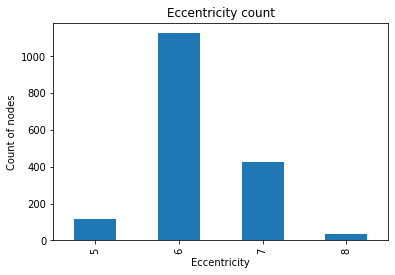

In [131]:
df = pd.DataFrame()

df["node"] = ec.keys()
df["eccentricity"] = ec.values()
ax = df["eccentricity"].value_counts().sort_index().plot(kind="bar", title = "Eccentricity count")
ax.set_xlabel("Eccentricity")
ax.set_ylabel("Count of nodes")

- Compute the **radius** of the graph (minimum eccentricity)

In [127]:
r = nx.radius(Gc) 
r

5

It makes sense that the radius is the eccentricity of the center nodes

- Compute the **periphery** (set of nodes with eccentricity equal to the diameter)

In [132]:
p = nx.periphery(Gc)
p

['almodad',
 'sheleph',
 'riphath',
 'togarmah',
 'hazarmaveth',
 'derbe',
 'daberath',
 'ashkenaz',
 'nicopolis',
 'jared',
 'maleleel',
 'lucas',
 'bohan',
 'geliloth',
 'shammoth',
 'achim',
 'sadoc',
 'prisca',
 'karkor',
 'enos',
 'sarid',
 'crescens',
 'lycaonia',
 'demas',
 'ispah',
 'helez',
 'joatham',
 'amal',
 'onesiphorus',
 'machbenah',
 'dalmatia',
 'achaz',
 'artemas',
 'azzur',
 'hizkijah']

In [133]:
len(p)

35

### 2.2 Clustering (of network)





Calculates the clustering coefficient - a measure of the prevelance of triangles in an egocentric network. 

The clustering coefficient is the fraction of possible triangles that contain the given node and exist. 

If the clustering coefficient of a node is 1, the node participates in every possible triangle involving any pair of its neighours; the egocentric network of such a node is a complete graph. If the clustering coefficient of a node is 0, no two nodes in the neigbourhood are connected; the egocentric network of such a node iss a ster. Think of clustering coefficient as a measure of "stardom"

In [136]:
cc = dict(nx.clustering(nx.Graph(Gc))); cc

{'israel': 0.039672448763357855,
 'judah': 0.059630886060191096,
 'jerusalem': 0.06068666568149352,
 'david': 0.06001645413410119,
 'saul': 0.10755758614125262,
 'moses': 0.13058419243986255,
 'aaron': 0.1795946890286513,
 'christ': 0.1292517006802721,
 'jesus': 0.12598770851624233,
 'egypt': 0.10486383958813168,
 'abraham': 0.18588399720475193,
 'isaac': 0.2803030303030303,
 'jacob': 0.17259615384615384,
 'jeroboam': 0.22363945578231292,
 'babylon': 0.12773047019622363,
 'pharaoh': 0.21176470588235294,
 'philistines': 0.0892929292929293,
 'sin': 0.22832980972515857,
 'benjamin': 0.11326105087572977,
 'jonathan': 0.11316763617133792,
 'joshua': 0.1907993966817496,
 'solomon': 0.11882716049382716,
 'samaria': 0.17016317016317017,
 'jordan': 0.1538662486938349,
 'joab': 0.1961038961038961,
 'peter': 0.2721774193548387,
 'ephraim': 0.11183719193427931,
 'abner': 0.3439153439153439,
 'manasseh': 0.11163032191069575,
 'nebat': 0.45,
 'eleazar': 0.1988388969521045,
 'jehoshaphat': 0.25320056

In [137]:
keys = cc.keys()
values = cc.values()

df_cc = pd.DataFrame()
df_cc["node"] = keys
df_cc["clustering_coef"] = values
df_cc.sort_values(by=["clustering_coef"], ascending = False, inplace = True)

In [138]:
df_cc

,node,clustering_coef
853,maai,1.000000
1142,hushathite,1.000000
1139,janoah,1.000000
1138,ozem,1.000000
1137,saruch,1.000000
...,...,...
16,philistines,0.089293
2,jerusalem,0.060687
3,david,0.060016
1,judah,0.059631


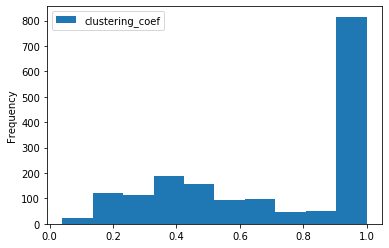

In [144]:
df_cc.plot.hist(by="clustering_coef", bins = 10)

In [ ]:
df_cc

Jesus clustering coefficient:

In [145]:
df_cc[df_cc.node=="jesus"]

,node,clustering_coef
8,jesus,0.125988


Nodes with clustering coefficient equal to 1:

In [146]:
df_cc[df_cc.clustering_coef==1]

,node,clustering_coef
853,maai,1.0
1142,hushathite,1.0
1139,janoah,1.0
1138,ozem,1.0
1137,saruch,1.0
...,...,...
577,tibni,1.0
551,adbeel,1.0
576,ginath,1.0
723,hatach,1.0


Average clustering coefficient (mean clustering coefficient for all nodes)

In [148]:
nx.average_clustering(nx.Graph(Gc))

0.7100244969091364

- **Transitivity** (clustering coefficient of the whole network, i.e. fraction of all possible triangles that exist in the network)

In [149]:
trans = nx.transitivity(Gc); trans

0.16249612832760055

Note that there is a great difference between the avg clustering coefficient and the clustering coef. of the whole network, that is because the elements of the network with cc = 1 inflate that metric.

- Compute the number of **Triangles** 

In [167]:
df_tri = pd.DataFrame.from_dict(nx.triangles(Gc),orient = "index", columns = ["triangles"])
df_tri

,triangles
israel,2621
judah,1916
jerusalem,1232
david,1459
saul,565
...,...
zephath,3
berothai,1
nephish,1
philippi,6


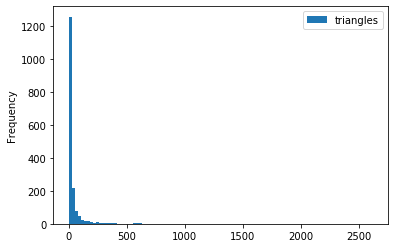

In [168]:
df_tri.plot.hist(by="triangles", bins = 100)

In [175]:
df_tri.head(20)

,triangles
israel,2621
judah,1916
jerusalem,1232
david,1459
saul,565
moses,608
aaron,257
christ,152
jesus,287
egypt,774


- Square clustering coefficient

In [178]:
scc = dict(nx.clustering(nx.Graph(Gc))); cc

{'israel': 0.039672448763357855,
 'judah': 0.059630886060191096,
 'jerusalem': 0.06068666568149352,
 'david': 0.06001645413410119,
 'saul': 0.10755758614125262,
 'moses': 0.13058419243986255,
 'aaron': 0.1795946890286513,
 'christ': 0.1292517006802721,
 'jesus': 0.12598770851624233,
 'egypt': 0.10486383958813168,
 'abraham': 0.18588399720475193,
 'isaac': 0.2803030303030303,
 'jacob': 0.17259615384615384,
 'jeroboam': 0.22363945578231292,
 'babylon': 0.12773047019622363,
 'pharaoh': 0.21176470588235294,
 'philistines': 0.0892929292929293,
 'sin': 0.22832980972515857,
 'benjamin': 0.11326105087572977,
 'jonathan': 0.11316763617133792,
 'joshua': 0.1907993966817496,
 'solomon': 0.11882716049382716,
 'samaria': 0.17016317016317017,
 'jordan': 0.1538662486938349,
 'joab': 0.1961038961038961,
 'peter': 0.2721774193548387,
 'ephraim': 0.11183719193427931,
 'abner': 0.3439153439153439,
 'manasseh': 0.11163032191069575,
 'nebat': 0.45,
 'eleazar': 0.1988388969521045,
 'jehoshaphat': 0.25320056

In [184]:
keys = scc.keys()
values = scc.values()

df_scc = pd.DataFrame()
df_scc["node"] = keys
df_scc["squared_clustering_coef"] = values
df_scc.sort_values(by=["squared_clustering_coef"], ascending = False, inplace = True)

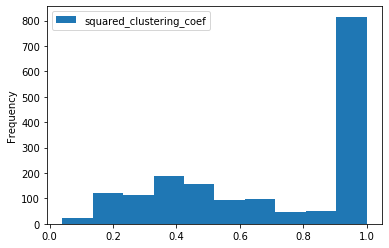

In [185]:
df_scc.plot.hist(by="squared_clustering_coef", bins = 10)


### 2.4 Statistical properties (clustering)
- Compute the **assortativity**





In [187]:
nx.degree_assortativity_coefficient(Gc)

-0.05185481897933272

The network is diassarotative

In [193]:
nx.attribute_assortativity_coefficient(Gc,"location")

nan

In [194]:
nx.degree_pearson_correlation_coefficient(Gc)

-0.05185481897933264

- Compute the **average neigbor degree**:


The average degree of a node is

$$
k_{nn,i} = \frac{1}{|N(i)|} \sum_{j\in N(i)}k_j
$$

where $N(i)$ are the neighbors of node $i$ and $k_j$ is the degree of node $j$ which belongs to $N(i)$. (The degree is the number of edges connected to each node).


In [197]:
nx.average_neighbor_degree(Gc)

{'israel': 24.266483516483518,
 'judah': 29.263779527559056,
 'jerusalem': 29.282178217821784,
 'david': 28.742081447963802,
 'saul': 35.57281553398058,
 'moses': 40.329896907216494,
 'aaron': 44.18518518518518,
 'christ': 29.836734693877553,
 'jesus': 29.91176470588235,
 'egypt': 37.959016393442624,
 'abraham': 45.25925925925926,
 'isaac': 61.15151515151515,
 'jacob': 47.96923076923077,
 'jeroboam': 50.48979591836735,
 'babylon': 39.0945945945946,
 'pharaoh': 59.885714285714286,
 'philistines': 32.32,
 'sin': 60.27272727272727,
 'benjamin': 40.345454545454544,
 'jonathan': 37.32258064516129,
 'joshua': 46.75,
 'solomon': 38.80246913580247,
 'samaria': 42.42424242424242,
 'jordan': 43.78409090909091,
 'joab': 48.142857142857146,
 'peter': 19.375,
 'ephraim': 40.51923076923077,
 'abner': 64.07142857142857,
 'manasseh': 38.25,
 'nebat': 71.25,
 'eleazar': 47.37735849056604,
 'jehoshaphat': 57.73684210526316,
 'simon': 18.08,
 'joseph': 40.84615384615385,
 'gilead': 39.344086021505376,
 '

In [198]:
df_avnd = pd.DataFrame.from_dict(nx.average_neighbor_degree(Gc),orient = "index", columns = ["average_network_degree"])
df_avnd

,average_network_degree
israel,24.266484
judah,29.263780
jerusalem,29.282178
david,28.742081
saul,35.572816
...,...
zephath,102.666667
berothai,8.500000
nephish,4.500000
philippi,44.500000


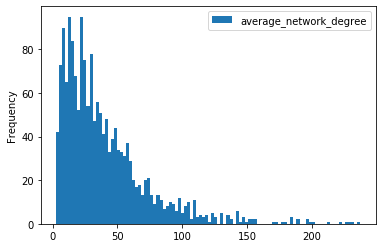

In [199]:
df_avnd.plot.hist(by="average_network_degree", bins = 100)